# 14 数据分析示例

## 14.1 从Bitly获取1.USA.gov数据

In [1]:
# 用户匿名数据，每一行都包含一种通用形式的web数据，为json格式
import json

import matplotlib.pyplot as plt

lines = []
with open("./examples/example.txt", 'r') as f:
    for line in f:
        lines.append(line)

In [2]:
# 返回一个Python字典的列表
records = [json.loads(lines[i]) for i in range(0, len(lines))]

In [3]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [4]:
# 提取时区
timestamp_zone = [rec['tz'] for rec in records if 'tz' in rec]

In [5]:
# 删除空置
tz = [i for i in timestamp_zone if i != '']

In [6]:
# 遍历时区，用字典来存储计数
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [7]:
from collections import defaultdict


def get_counts2(sequence):
    counts = defaultdict(int)  # 将值初始化为0
    for x in sequence:
        counts[x] += 1
    return counts

In [8]:
counts = get_counts(timestamp_zone)
counts['America/New_York']

1251

In [9]:
len(timestamp_zone)

3440

In [10]:
# 取前10的时区和它们的计数
def top10_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort(reverse=True)
    return value_key_pairs[:10]

In [11]:
top10_counts(counts)

[(1251, 'America/New_York'),
 (521, ''),
 (400, 'America/Chicago'),
 (382, 'America/Los_Angeles'),
 (191, 'America/Denver'),
 (74, 'Europe/London'),
 (37, 'Asia/Tokyo'),
 (36, 'Pacific/Honolulu'),
 (35, 'Europe/Madrid'),
 (33, 'America/Sao_Paulo')]

In [12]:
# 使用标准库collections.Counter更简单
from collections import Counter

counts = Counter(timestamp_zone)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

### 14.1.2 使用pandas进行时区计数

In [13]:
import pandas as pd

frame = pd.DataFrame(records)
frame.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [14]:
clean_tz = frame.tz.fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
clean_tz

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
               ...         
3555       America/New_York
3556        America/Chicago
3557         America/Denver
3558    America/Los_Angeles
3559       America/New_York
Name: tz, Length: 3560, dtype: object

<AxesSubplot:>

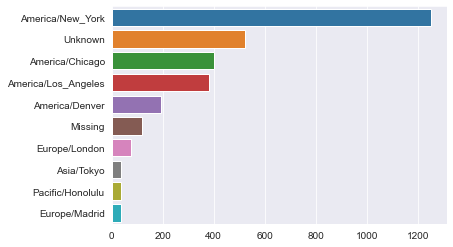

In [15]:
# 绘图
import seaborn as sns

#%matplotlib notebook

tz_top10 = clean_tz.value_counts()[:10]
sns.barplot(y=tz_top10.index, x=tz_top10.values)

In [16]:
# 解析frame的a列
frame.a.head()

0    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                               GoogleMaps/RochesterNY
2    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: a, dtype: object

In [17]:
# 来区分是否包含Windows
frame_os = frame[frame.a.notnull()]
frame_os.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [18]:
import numpy as np

frame_os['os'] = np.where(frame_os.a.str.contains('Windows'), 'Windows', 'Not Windows')

/var/folders/ml/8mffbtvx25b6ftr05mlfbtqm0000gn/T/ipykernel_91613/480775385.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_os['os'] = np.where(frame_os.a.str.contains('Windows'), 'Windows', 'Not Windows')


In [19]:
frame_os.os.value_counts()

Windows        2246
Not Windows    1194
Name: os, dtype: int64

In [20]:
type(frame_os['a'][0])

str

In [21]:
# 使用时区和操作系统分组
groupby_tz_os = frame_os.groupby(['tz', 'os'])
agg_counts = groupby_tz_os.size().unstack().fillna(0)
agg_counts[:10]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [22]:
# 选出总体计数最高的时区
indexer = agg_counts.sum(1).argsort()
indexer

tz
                       24
Africa/Cairo           20
Africa/Casablanca      21
Africa/Ceuta           92
Africa/Johannesburg    87
                       ..
Europe/Volgograd       15
Europe/Warsaw          22
Europe/Zurich          12
Pacific/Auckland        0
Pacific/Honolulu       29
Length: 97, dtype: int64

In [23]:
# 使用take方法按顺序选出行，之后再对最后10行进行切片
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [24]:
top_tz = agg_counts.sum(1).nlargest(10)
top_tz

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

<AxesSubplot:ylabel='tz'>

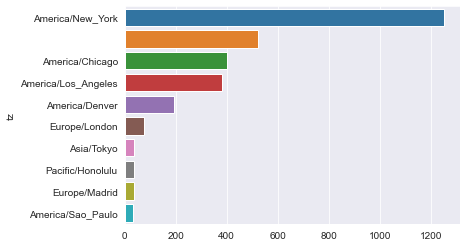

In [25]:
sns.barplot(y=top_tz.index, x=top_tz.values)

In [26]:
count_subset = count_subset.stack()
count_subset.name = 'total'
count_subset = count_subset.reset_index()
count_subset[:10]

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


<AxesSubplot:xlabel='total', ylabel='tz'>

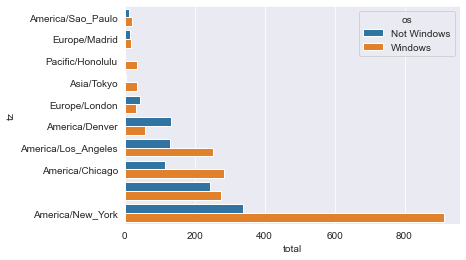

In [27]:
sns.barplot(x='total', y='tz', hue='os', data=count_subset)

<AxesSubplot:xlabel='norm_total', ylabel='tz'>

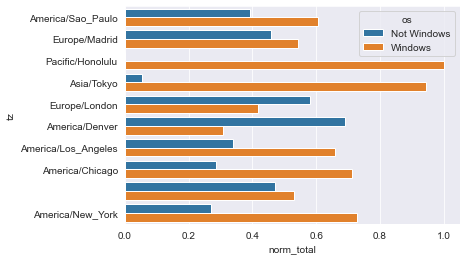

In [28]:
# 该图不容易看出较小组中Windows用户的相对百分比，因此可以将百分比归一化为1
def norm_total(group):
    group['norm_total'] = group.total / group.total.sum()
    return group


results = count_subset.groupby('tz').apply(norm_total)
sns.barplot(x='norm_total', y='tz', hue='os', data=results)

In [29]:
count_subset.head()

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0


In [30]:
# 可以通过transform和groupby方法有效地计算归一化只和
g = count_subset.groupby('tz')
results2 = count_subset.total / g.total.transform('sum')
results2

0     0.393939
1     0.606061
2     0.457143
3     0.542857
4     0.000000
5     1.000000
6     0.054054
7     0.945946
8     0.581081
9     0.418919
10    0.691099
11    0.308901
12    0.340314
13    0.659686
14    0.287500
15    0.712500
16    0.470250
17    0.529750
18    0.270983
19    0.729017
Name: total, dtype: float64

## 14.2 MovieLens 1M数据集
MovieLens 1M数据集包含了6000用户对4000部电影的100万个评分，数据分布在三个个表格中：评分，用户信息和电影信息

In [31]:
# 展示内容设置为10行
pd.options.display.max_rows = 10
# 读取用户数据
user_names = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('./examples/users.dat',
                      sep='::',
                      header=None,
                      names=user_names,
                      engine='python')
# 读取评分数据
rate_names = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('./examples/ratings.dat',
                        sep='::',
                        header=None,
                        names=rate_names,
                        engine='python')
# 读取电影数据
movie_names = ['movie_id', 'title', 'genres']
movies = pd.read_table('./examples/movies.dat',
                       sep='::',
                       header=None,
                       names=movie_names,
                       engine='python')

In [32]:
users[:5]
# 年龄职业都是编码

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [33]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [34]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [35]:
# 要分析数据，首先将3份数据合并到一起
data = pd.merge(pd.merge(users, ratings), movies)
data[:5]

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [36]:
data.loc[data.title == 'Toy Story (1995)']

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
41626,1,F,1,10,48067,1,5,978824268,Toy Story (1995),Animation|Children's|Comedy
41627,6,F,50,9,55117,1,4,978237008,Toy Story (1995),Animation|Children's|Comedy
41628,8,M,25,12,11413,1,4,978233496,Toy Story (1995),Animation|Children's|Comedy
41629,9,M,25,17,61614,1,5,978225952,Toy Story (1995),Animation|Children's|Comedy
41630,10,F,35,1,95370,1,5,978226474,Toy Story (1995),Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
43698,6022,M,25,17,57006,1,5,956755763,Toy Story (1995),Animation|Children's|Comedy
43699,6025,F,25,1,32607,1,5,956812867,Toy Story (1995),Animation|Children's|Comedy
43700,6032,M,45,7,55108,1,4,956718127,Toy Story (1995),Animation|Children's|Comedy
43701,6035,F,25,1,78734,1,4,956712849,Toy Story (1995),Animation|Children's|Comedy


In [37]:
# 为了获得性别分级的每部电影的平均电影评分，使用pivot_table方法
mean_rating = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
mean_rating[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [38]:
# 过滤掉评分较少的电影
rating_count = data.groupby('title').size()
rating_count[:5]

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [39]:
active_titles = rating_count.index[rating_count.values >= 250]
active_titles[:5]

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)',
       '12 Angry Men (1957)'],
      dtype='object', name='title')

In [40]:
# 获取评分大于等于250个的电影平均评分
mean_rating = mean_rating.loc[active_titles]
mean_rating[:10]

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738


In [41]:
# 通过join方式实现
# 首先获取评分数量大于等于250的电影
rating_250 = rating_count[rating_count.values >= 250]
rating_250.name = 'rating_count'
mean_rating_250 = mean_rating.join(rating_250, on='title')
mean_rating_250[:10]

,F,M,rating_count
title,,,
"'burbs, The (1989)",2.793478,2.962085,303
10 Things I Hate About You (1999),3.646552,3.311966,700
101 Dalmatians (1961),3.791444,3.500000,565
101 Dalmatians (1996),3.240000,2.911215,364
12 Angry Men (1957),4.184397,4.328421,616
"13th Warrior, The (1999)",3.112000,3.168000,750
2 Days in the Valley (1996),3.488889,3.244813,286
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205,575
2001: A Space Odyssey (1968),3.825581,4.129738,1716


In [42]:
# 通过merge方式实现
mean_rating_merge = pd.merge(mean_rating, rating_250, left_index=True, right_index=True)
mean_rating_merge[:10]

,F,M,rating_count
title,,,
"'burbs, The (1989)",2.793478,2.962085,303
10 Things I Hate About You (1999),3.646552,3.311966,700
101 Dalmatians (1961),3.791444,3.500000,565
101 Dalmatians (1996),3.240000,2.911215,364
12 Angry Men (1957),4.184397,4.328421,616
"13th Warrior, The (1999)",3.112000,3.168000,750
2 Days in the Valley (1996),3.488889,3.244813,286
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205,575
2001: A Space Odyssey (1968),3.825581,4.129738,1716


In [43]:
# 查看女性评分排名
top_female_ratings = mean_rating.sort_values(by='F', ascending=False)
top_female_ratings[:5]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415


### 14.2.1 测量评价分歧
男性与女性评分平均值差别最大的电影

In [44]:
mean_rating['diff'] = mean_rating['M'] - mean_rating['F']
mean_rating.sort_values(by='diff', ascending=True)[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [45]:
# 不依赖性别，电影评分分歧最大的，可以通过标准差来评估
rating_std_by_title = data.groupby('title')['rating'].std()
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

In [46]:
genres_cat = data.groupby(['title', 'genres']).size()
genres_cat.name = 'count'

In [47]:
genres_cat_df = genres_cat.to_frame().reset_index()
genres_cat_df[:10]

,title,genres,count
0,"$1,000,000 Duck (1971)",Children's|Comedy,37
1,'Night Mother (1986),Drama,70
2,'Til There Was You (1997),Drama|Romance,52
3,"'burbs, The (1989)",Comedy,303
4,...And Justice for All (1979),Drama|Thriller,199
5,1-900 (1994),Romance,2
6,10 Things I Hate About You (1999),Comedy|Romance,700
7,101 Dalmatians (1961),Animation|Children's,565
8,101 Dalmatians (1996),Children's|Comedy,364
9,12 Angry Men (1957),Drama,616


### 14.3 美国1880-2010出生婴儿的名字

In [48]:
# 首先读取数据，每一年的数据存放于一个文件中，将其合并到一起
years = range(1880, 2011)
pieces = []
columns = ['name', 'sex', 'births']
for year in years:
    path = './examples/babynames/yob' + str(year) + '.txt'
    frame = pd.read_table(path, names=columns, sep=',')
    frame['year'] = year
    pieces.append(frame)
names = pd.concat(pieces, ignore_index=True)

In [49]:
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [50]:
names.groupby('sex').size()

sex
F    1003985
M     686799
dtype: int64

<AxesSubplot:xlabel='year', ylabel='F'>

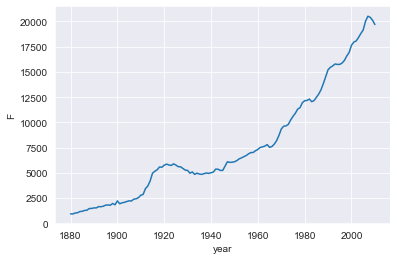

In [51]:
import seaborn as sns

# 汇总每年出生小孩的数量
year_born_cnt = names.groupby(['year', 'sex']).size().unstack()
# 画图
sns.lineplot(y=year_born_cnt.F, x=year_born_cnt.index)

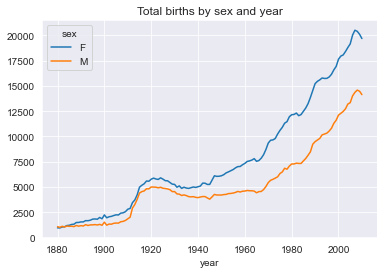

In [52]:
import matplotlib.pyplot as plt

year_born_cnt.plot(title='Total births by sex and year')
plt.show()

In [53]:
# 计算每个婴儿名字占比
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group


names = names.groupby(['year', 'sex']).apply(add_prop)
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [54]:
# 验证总体占比是否为1
names.groupby(['year', 'sex']).prop.sum().head()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
Name: prop, dtype: float64

In [55]:
names.head(5)

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [56]:
# 每个性别/年份组合的前1000名
def get_top1000(group):
    group.sort_values(by='births', ascending=False)


top1000 = None
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000.reset_index(inplace=True, drop=True)

In [57]:
# 或者使用这种方式也可以
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)
top1000.head(10)

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [58]:
# 取年份&性别组合下，名字的前100名
def get_top1000(group):
    group.sort_values(by='births', ascending=False)


top_1k = names.groupby(['year', 'sex']).apply(get_top1000)
# 这个代码并没有用，top1k为空
top_1k.reset_index(inplace=True, drop=True)

In [59]:
pieces = []
for _, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=False)
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [60]:
# groupby之后时可迭代的数据结构，可以取出其中的数据
# 第一个为元组，例如(1880, F)
# 第二个为DataFrame
for _, group in names.groupby(['year', 'sex']):
    print(type(_), type(group))
    break

<class 'tuple'> <class 'pandas.core.frame.DataFrame'>


In [61]:
# groupby之后生成的数据结构是pandas.core.groupby.generic.DataFrameGroupBy
type(names.groupby(['year', 'sex']))

pandas.core.groupby.generic.DataFrameGroupBy

### 14.3.1 分析名字的趋势

In [62]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [63]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

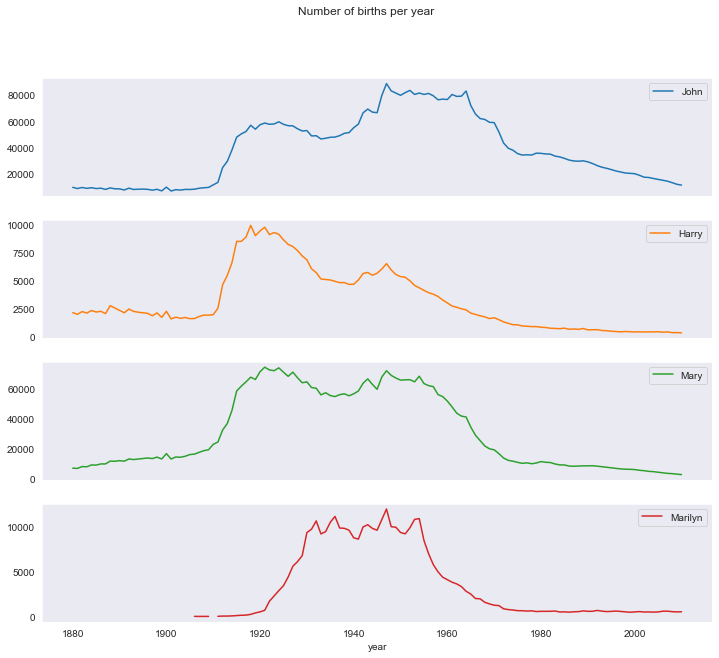

In [64]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), title='Number of births per year', grid=False)

<AxesSubplot:title={'center':'Sum os Top1000.prop by year and sex'}, xlabel='year'>

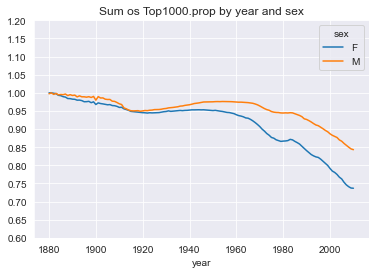

In [65]:
# Top1000最受欢迎的名字所涵盖婴儿的出生比例
name_rate = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)
name_rate.plot(title='Sum os Top1000.prop by year and sex',
               xticks=range(1880, 2020, 20),
               yticks=np.linspace(0.6, 1.2, 13))

In [66]:
# 2020年男孩最受欢迎的名字在出生人群中占比最高的50%
df = boys[boys.year == 2010]
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]

1676644    0.011523
1676645    0.020934
1676646    0.029959
1676647    0.038930
1676648    0.047817
1676649    0.056579
1676650    0.065155
1676651    0.073414
1676652    0.081528
1676653    0.089621
Name: prop, dtype: float64

In [67]:
# 想知道最受欢迎的50%，可以获取prop的累计总和cumsum，然后调用searchsorted方法返回累计和中的位置，在该处插入0.5以保持排序顺序
prop_cumsum.values.searchsorted(0.5)

116

In [68]:
# 按照此方法找出每年最受欢迎的50%的名字
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    # 范围超过50%的名字所在的行号，也就是名字的数量
    return group.prop.cumsum().values.searchsorted(q) + 1


diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity.tail().unstack()

sex,F,M
year,,
2008,NaN,109.0
2009,241.0,114.0
2010,246.0,117.0


<AxesSubplot:xlabel='year'>

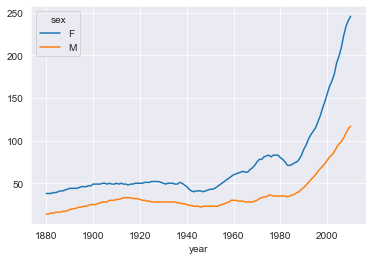

In [69]:
diversity.unstack().plot()

In [70]:
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc='sum')
table.head()

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2001      2002      2003   
last_letter                             ...                                 
a            48942.0  59442.0  58631.0  ...   39124.0   38815.0   37825.0   
b                NaN      NaN      NaN  ...   50950.0   49284.0   48065.0   
c                NaN      NaN      NaN  ...   27113.0   27238.0   27697.0   
d             1027.0   1298.0   1374.0  ...   60838.0   55829.0   53391.0   
e            54353.0  66750.0  66663.0  ...  145395.0  144651.0  144769.0   

sex                                                                      \
year             2004      2005      2006      2007      2008      2009   
last_letter                                                               
a             38650.0   36838.0   36156.0   34654.0   32901.0   31430.0   
b             45914.0   43144.0   42600.0   42123.0   39945.0   38862.0   
c             26778.0   26078.0   26635.0   26864.0   25318.0   24048.0   
d             51754.0   50670.0   51410.0   50595.0   47910.0   46172.0   
e            142098.0  141123.0  142999.0  143698.0  140966.0  135496.0   

sex                    
year             2010  
last_letter            
a             28438.0  
b             38859.0  
c             23125.0  
d             44398.0  
e            129012.0  

[5 rows x 262 columns]

In [71]:
# 选出三个有代表性的年份
subtable = table.reindex(level='year', columns=[1910, 1960, 2010])
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [72]:
# 归一化处理
letter_prop = subtable / subtable.sum()
letter_prop.head()

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959

<AxesSubplot:title={'center':'Male'}, xlabel='last_letter'>

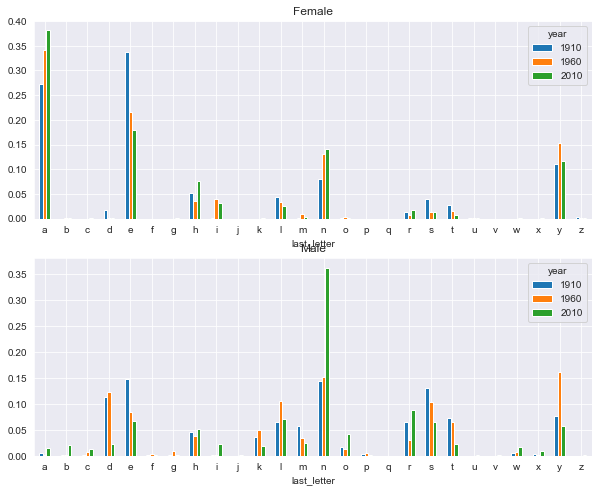

In [73]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop.F.plot(kind='bar', rot=0, ax=axes[0], title='Female')
letter_prop.M.plot(kind='bar', rot=0, ax=axes[1], title='Male')

In [74]:
# 回到table，再次按照年份和性别进行标准化，并为男孩名选择一个字母子集，最后转换为一个时间序列
letter_prop = table / table.sum()
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


<AxesSubplot:xlabel='year'>

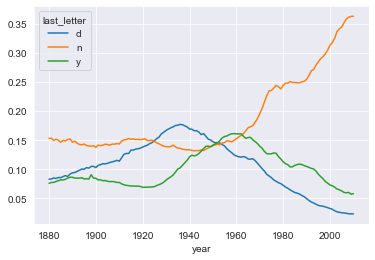

In [75]:
dny_ts.plot()

## 14.4 美国农业食品数据库

In [76]:
import json

In [77]:
db = json.load(open('./examples/database.json'))
len(db)

6636

In [78]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [79]:
db[0]['nutrients'][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [80]:
# 将nutrients转化为DataFrame
nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients.head()

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy


In [81]:
# 将部分字段转化为DataFrame
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns=info_keys)
info.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [82]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [83]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [84]:
nutrients.duplicated().sum()

108

In [85]:
# 删除nutrients中的重复数据
nutrients = nutrients.drop_duplicates()

In [86]:
# 重命名列
col_mapping = {'description': 'food', 'group': 'fgroup'}
info = info.rename(columns=col_mapping, copy=False)
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   fgroup        6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [87]:
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients.head()

,value,units,food,fgroup
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy


In [88]:
info.head()

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [89]:
# 将每个食物的id和营养元素组装成一张大表
db_list = []
for i in range(0, len(db)):
    df = pd.DataFrame(db[i]['nutrients'])
    # 给营养元素添加上id
    df['id'] = db[i]['id']
    db_list.append(df)
# 使用concat将DataFrame连接起来
nutrients = None
nutrients = pd.concat(db_list, ignore_index=True)
nutrients.head()

,value,units,description,group,id
0,25.18,g,Protein,Composition,1008
1,29.20,g,Total lipid (fat),Composition,1008
2,3.06,g,"Carbohydrate, by difference",Composition,1008
3,3.28,g,Ash,Other,1008
4,376.00,kcal,Energy,Energy,1008


In [90]:
len(nutrients)

389355

In [91]:
# 删除nutrients中重复的数据
nutrients = nutrients.drop_duplicates()

In [92]:
# 重命名nutrients中列名
col_mapping_1 = {'description': 'nutrient', 'group': 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping_1, copy=False)

In [93]:
# 将info和nutrients合并
ndata = None
ndata = pd.merge(nutrients, info, on='id', how='outer')
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   value         375176 non-null  float64
 1   units         375176 non-null  object 
 2   nutrient      375176 non-null  object 
 3   nutgroup      375176 non-null  object 
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


In [94]:
ndata.iloc[30000]

value                                             0.04
units                                                g
nutrient                                       Glycine
nutgroup                                   Amino Acids
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

<AxesSubplot:title={'center':'Ranking of food zinc content'}, ylabel='fgroup'>

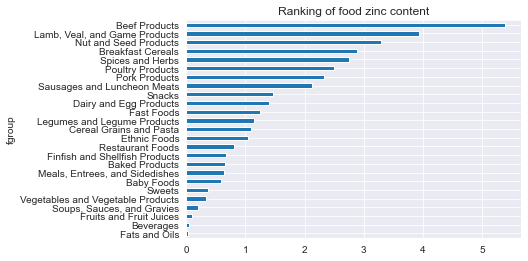

In [95]:
# 可以根据食物组和营养类型制作一个中位数图
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile()
result['Zinc, Zn'].sort_values().plot(kind='barh', title='Ranking of food zinc content')

## 14.5 2012年联邦选举委员会数据库

In [97]:
fec = pd.read_csv('./examples/P00000001-ALL.csv')
fec.head()

/var/folders/ml/8mffbtvx25b6ftr05mlfbtqm0000gn/T/ipykernel_91613/350368369.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  fec = pd.read_csv('./examples/P00000001-ALL.csv')


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [98]:
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [99]:
fec.iloc[123456]

cmte_id             C00431445
cand_id             P80003338
cand_nm         Obama, Barack
contbr_nm         ELLMAN, IRA
contbr_city             TEMPE
                    ...      
receipt_desc              NaN
memo_cd                   NaN
memo_text                 NaN
form_tp                 SA17A
file_num               772372
Name: 123456, Length: 16, dtype: object